In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import itertools
import collections
import nltk
from nltk import bigrams
import networkx as nx

In [3]:
df = pd.read_excel("./tweets-en.xlsx")

In [5]:
df.to_csv("tweets-en.csv")

In [6]:
tweets = pd.read_csv('C:/Users/alone/dilisleme/tweets-en.csv', engine="python", sep=',', quotechar='"', error_bad_lines=False)
print(tweets)

     Unnamed: 0                                              tweet
0             0  Dalam Cop-27 di mesir, Indonesia Menampilkan K...
1             1  With global trade wars and global terrorism, a...
2             2  #The last part of the #iygundekügünde is “Anth...
3             3  Damp Yang Paling Berbahaya Iteu Bukan Climate ...
4             4  @Havaforum, but this is a tropical climate? It...
..          ...                                                ...
198         198  Points Mahani Menyoroti Soal Krisis Pangan Ene...
199         199  I think that the climate activists throwing to...
200         200  While the horses of the capital owners in the ...
201         201  naya di lawan wkwkwwk ketawa aja dah https://t...
202         202  Anjayyy anjayy anjayyyyyyyyyyyyyyyyyyyyyyyyyyy...

[203 rows x 2 columns]


C:\Users\alone\AppData\Local\Temp\ipykernel_17680\1640088183.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv('C:/Users/alone/dilisleme/tweets-en.csv', engine="python", sep=',', quotechar='"', error_bad_lines=False)


In [7]:
tweet= tweets["tweet"].str.split(',')
print (tweet)

0      [Dalam Cop-27 di mesir,  Indonesia Menampilkan...
1      [With global trade wars and global terrorism, ...
2      [#The last part of the #iygundekügünde is “Ant...
3      [Damp Yang Paling Berbahaya Iteu Bukan Climate...
4      [@Havaforum,  but this is a tropical climate? ...
                             ...                        
198    [Points Mahani Menyoroti Soal Krisis Pangan En...
199    [I think that the climate activists throwing t...
200    [While the horses of the capital owners in the...
201    [naya di lawan wkwkwwk ketawa aja dah https://...
202    [Anjayyy anjayy anjayyyyyyyyyyyyyyyyyyyyyyyyyy...
Name: tweet, Length: 203, dtype: object


In [8]:
#urel kaldırma

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [9]:
#url kaldırılmış halini çağırma

all_tweets_no_urls = [remove_url(tweet) for tweet in tweet]
all_tweets_no_urls[:5]

['Dalam Cop27 di mesir Indonesia Menampilkan Kebijakan from Hasil Nyata Kerja Serta Membuka Jalan Divine Ambali Climate Table Depan Bersama Sejumlah Pihak',
 'With global trade wars and global terrorism a new world order is being established Migration energy climate crises income distribution inequality and combating poverty we go through a test as humanity',
 'The last part of the iygundekgnde is AnthropocenennIn this section guests are discussing the discussions around denizbayram and fotibenlisoy around the concept and the possibilities of climatic justicen',
 'Damp Yang Paling Berbahaya Iteu Bukan Climate Tapi System Capitalism Dengan Economy LiberalnyannmbutvofficialnnEconomiliberalnDakwahperubahannSlamkaffahnbanggamengadimuslim',
 'Havaforum but this is a tropical climate It is absolutely abnormal to see a hose in Turkey']

In [10]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("Dalam Cop27 di mesir Indonesia Menampilkan Kebijakan from Hasil Nyata Kerja Serta Membuka Jalan Divine Ambali Climate Table Depan Bersama Sejumlah Pihak"))

In [11]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'Dalam Cop27 di mesir Indonesia Menampilkan Kebijakan from Hasil Nyata Kerja Serta Membuka Jalan Divine Ambali Climate Table Depan Bersama Sejumlah Pihak']

In [12]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(15)

,polarity,tweet
0,0.000000,Dalam Cop27 di mesir Indonesia Menampilkan Keb...
1,0.045455,With global trade wars and global terrorism a ...
2,0.000000,The last part of the iygundekgnde is Anthropoc...
3,0.000000,Damp Yang Paling Berbahaya Iteu Bukan Climate ...
4,0.200000,Havaforum but this is a tropical climate It is...
5,0.000000,Pakistan will be looking for climate justice a...
6,0.000000,Iklim Sheila Bila Kau Terluka aku Pun Tersika
7,0.000000,8 KANWL KANWL KANENKUMHAM SULSEL SUPRAPTO SAMP...
8,0.800000,Participating in the United Nations Climate Ch...
9,0.000000,Desa tanggap perfebahaan


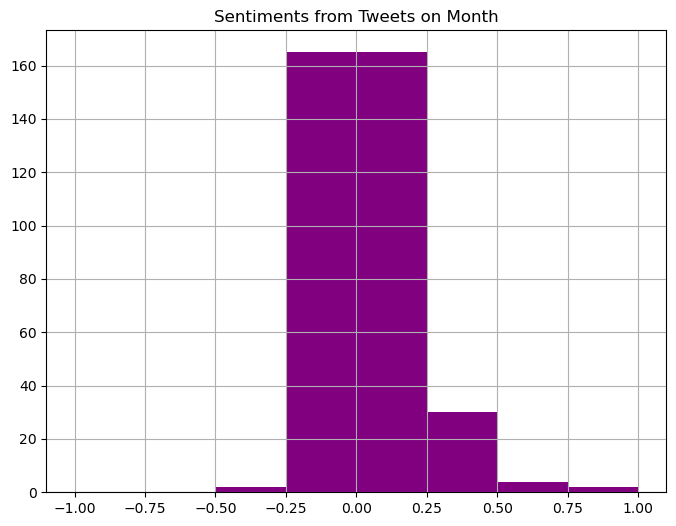

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Month")
plt.show()

In [14]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

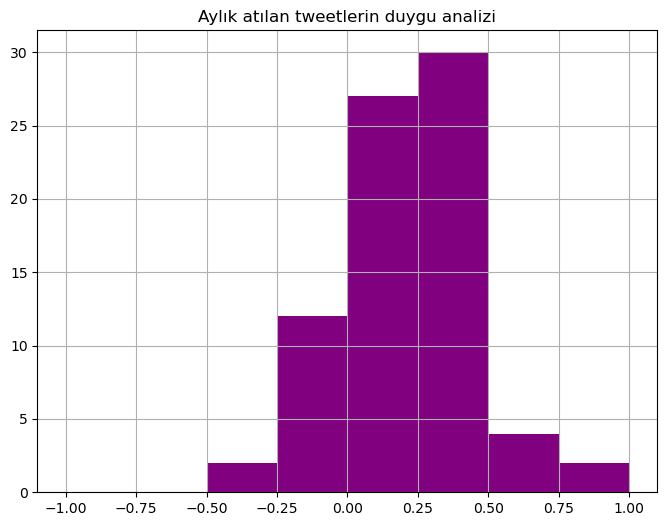

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Aylık atılan tweetlerin duygu analizi")
plt.show()

#BURAYI AL

In [16]:
# Remove polarity values equal to zero
pos_df =sentiment_df[sentiment_df.polarity > 0]
pos_df

,polarity,tweet
1,0.045455,With global trade wars and global terrorism a ...
4,0.200000,Havaforum but this is a tropical climate It is...
8,0.800000,Participating in the United Nations Climate Ch...
11,0.250000,veroaktivis gagaknew Chana karena demo sambil ...
13,0.300000,Onontweets in Turkey as a much superior place ...
...,...,...
187,0.300000,At the UN Climate Summit issues such as reduci...
194,0.100000,My asset offers seven climates to my geographyn
196,0.025000,Germany In Munich 12 climatic activists will b...
199,0.366667,I think that the climate activists throwing to...


In [17]:
print(np.average(pos_df['polarity'])) #BURAYI AL

0.25842137359994505


In [18]:
pos_tweet= pos_df["tweet"].str.split(',')
print (pos_tweet)

1      [With global trade wars and global terrorism a...
4      [Havaforum but this is a tropical climate It i...
8      [Participating in the United Nations Climate C...
11     [veroaktivis gagaknew Chana karena demo sambil...
13     [Onontweets in Turkey as a much superior place...
                             ...                        
187    [At the UN Climate Summit issues such as reduc...
194    [My asset offers seven climates to my geographyn]
196    [Germany In Munich 12 climatic activists will ...
199    [I think that the climate activists throwing t...
200    [While the horses of the capital owners in the...
Name: tweet, Length: 63, dtype: object


In [19]:
#urel kaldırma

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [20]:
#url kaldırılmış halini çağırma

pos_all_tweets_no_urls = [remove_url(tweet) for tweet in pos_tweet]
pos_all_tweets_no_urls[:5]

['With global trade wars and global terrorism a new world order is being established Migration energy climate crises income distribution inequality and combating poverty we go through a test as humanity',
 'Havaforum but this is a tropical climate It is absolutely abnormal to see a hose in Turkey',
 'Participating in the United Nations Climate Change Conference the running level Kerembresin always makes us proud of what you do man',
 'veroaktivis gagaknew Chana karena demo sambil ibadah lebih baik daripada demo sambil minimum legacy ata narkoba bukkan artinya bisa ibadah sesukanya itu logical fallacynibadah jg island aturannya negara lain mikirin hidup di planet lain perfebahan climate Disini aja masih demo2 gak gelas',
 'Onontweets in Turkey as a much superior place in the position and climate this golden geography sinks in our hands as it deserves as you deserve to shine like the sun']

In [21]:
# Create a list of lists containing lowercase words for each tweet; url olmadan küçük harflere ayırma #tokenizer
pos_words_in_tweet = [tweet.lower().split() for tweet in pos_all_tweets_no_urls]
pos_words_in_tweet[:2]

[['with',
  'global',
  'trade',
  'wars',
  'and',
  'global',
  'terrorism',
  'a',
  'new',
  'world',
  'order',
  'is',
  'being',
  'established',
  'migration',
  'energy',
  'climate',
  'crises',
  'income',
  'distribution',
  'inequality',
  'and',
  'combating',
  'poverty',
  'we',
  'go',
  'through',
  'a',
  'test',
  'as',
  'humanity'],
 ['havaforum',
  'but',
  'this',
  'is',
  'a',
  'tropical',
  'climate',
  'it',
  'is',
  'absolutely',
  'abnormal',
  'to',
  'see',
  'a',
  'hose',
  'in',
  'turkey']]

In [22]:
# List of all words across tweets; kelimelerin sayılması
pos_all_words_no_urls = list(itertools.chain(*pos_words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(pos_all_words_no_urls)

counts_no_urls.most_common(15)

[('the', 111),
 ('climate', 56),
 ('in', 54),
 ('of', 36),
 ('a', 35),
 ('to', 35),
 ('and', 31),
 ('be', 23),
 ('is', 18),
 ('as', 18),
 ('should', 14),
 ('are', 14),
 ('it', 13),
 ('that', 13),
 ('activists', 12)]

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
#var olanların gösterimi
from nltk.corpus import stopwords
pos_stop_words = set(stopwords.words('english'))

# View a few words from the set
list(pos_stop_words)[0:10]

['those', 'own', 'just', 'hasn', 'was', 'we', 'yours', 'they', 'them', "isn't"]

In [25]:
# Remove stop words from each tweet list of words; kaldırılmış durumu
pos_tweets_nsw = [[word for word in tweet_words if not word in pos_stop_words]
              for tweet_words in pos_words_in_tweet]

pos_tweets_nsw[0]

['global',
 'trade',
 'wars',
 'global',
 'terrorism',
 'new',
 'world',
 'order',
 'established',
 'migration',
 'energy',
 'climate',
 'crises',
 'income',
 'distribution',
 'inequality',
 'combating',
 'poverty',
 'go',
 'test',
 'humanity']

In [26]:
#çok kullanılanlara tekrar bakılırsa
pos_all_words_nsw = list(itertools.chain(*pos_tweets_nsw))

pos_counts_nsw = collections.Counter(pos_all_words_nsw)

pos_counts_nsw.most_common(15)

[('climate', 56),
 ('activists', 12),
 ('summit', 11),
 ('change', 10),
 ('climatic', 10),
 ('think', 10),
 ('world', 9),
 ('countries', 9),
 ('get', 8),
 ('un', 8),
 ('turkey', 7),
 ('air', 7),
 ('order', 6),
 ('like', 6),
 ('plan', 6)]

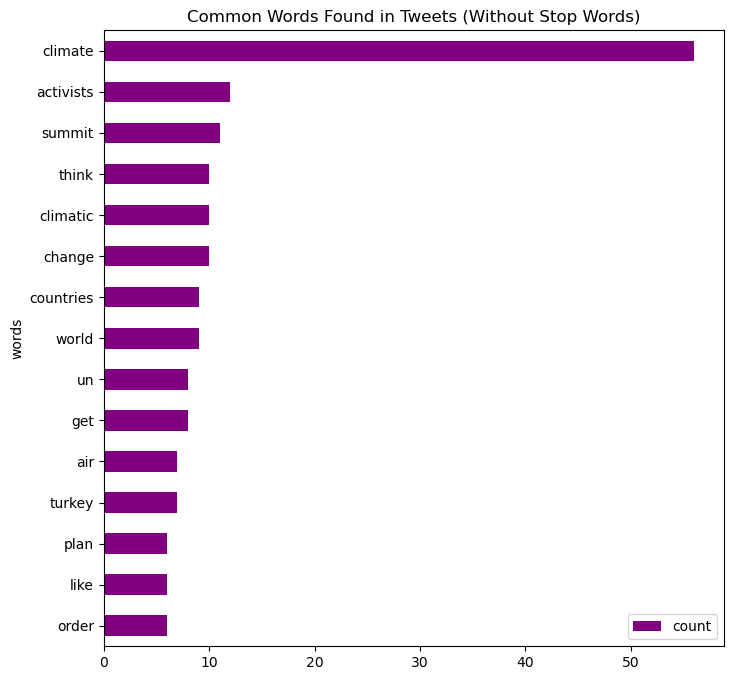

In [27]:
#görselleştirme
pos_clean_tweets_nsw = pd.DataFrame(pos_counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pos_clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [32]:
#arama kelimesinin kaldırılması

pos_collection_words = ['climate', 'change', 'climatic' ]
pos_tweets_nsw_nc = [[w for w in word if not w in pos_collection_words]
                 for word in pos_tweets_nsw]
pos_tweets_nsw[0]

['global',
 'trade',
 'wars',
 'global',
 'terrorism',
 'new',
 'world',
 'order',
 'established',
 'migration',
 'energy',
 'climate',
 'crises',
 'income',
 'distribution',
 'inequality',
 'combating',
 'poverty',
 'go',
 'test',
 'humanity']

In [33]:
# Flatten list of words in clean tweets    #BURAYI AL
pos_all_words_nsw_nc = list(itertools.chain(*pos_tweets_nsw_nc))

# Create counter of words in clean tweets
pos_counts_nsw_nc = collections.Counter(pos_all_words_nsw_nc)

pos_counts_nsw_nc.most_common(15)  

[('activists', 12),
 ('summit', 11),
 ('think', 10),
 ('world', 9),
 ('countries', 9),
 ('get', 8),
 ('un', 8),
 ('turkey', 7),
 ('air', 7),
 ('order', 6),
 ('like', 6),
 ('plan', 6),
 ('conditions', 6),
 ('india', 6),
 ('many', 6)]

In [34]:
pos_clean_tweets_ncw = pd.DataFrame(pos_counts_nsw_nc.most_common(15), # en fazla değişken kelime buradan değişir
                             columns=['words', 'count'])
pos_clean_tweets_ncw.head()

,words,count
0,activists,12
1,summit,11
2,think,10
3,world,9
4,countries,9


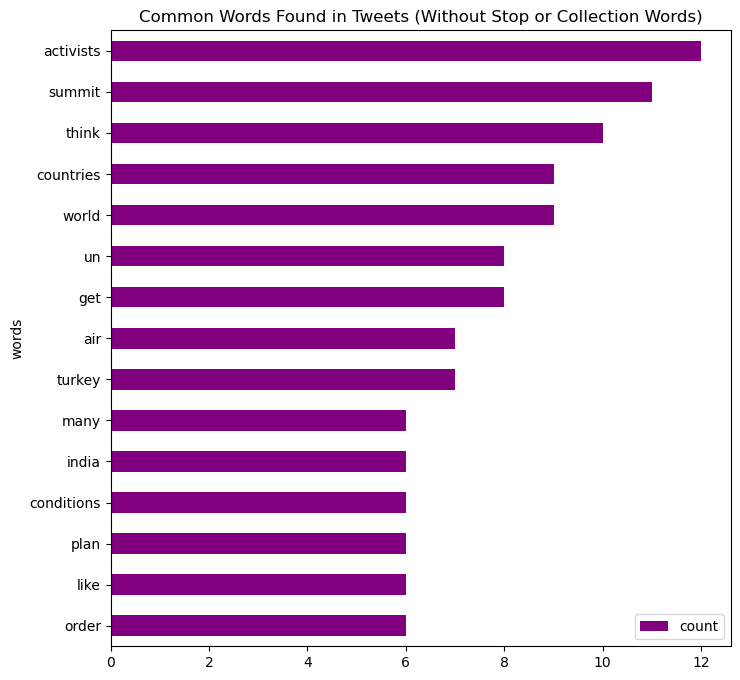

In [35]:
fig, ax = plt.subplots(figsize=(8, 8)) #çıktının boyutu 

# Plot horizontal bar graph
pos_clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)") #başlık

plt.show()

In [36]:
#Explore Co-occurring Words
# Create list of lists containing bigrams in tweets
pos_terms_bigram = [list(bigrams(tweet)) for tweet in pos_tweets_nsw_nc]

# View bigrams for the first tweet
pos_terms_bigram[0]

[('global', 'trade'),
 ('trade', 'wars'),
 ('wars', 'global'),
 ('global', 'terrorism'),
 ('terrorism', 'new'),
 ('new', 'world'),
 ('world', 'order'),
 ('order', 'established'),
 ('established', 'migration'),
 ('migration', 'energy'),
 ('energy', 'crises'),
 ('crises', 'income'),
 ('income', 'distribution'),
 ('distribution', 'inequality'),
 ('inequality', 'combating'),
 ('combating', 'poverty'),
 ('poverty', 'go'),
 ('go', 'test'),
 ('test', 'humanity')]

In [37]:
# Flatten list of bigrams in clean tweets      BURAYI AL
pos_bigrams = list(itertools.chain(*pos_terms_bigram))

# Create counter of words in clean bigrams
pos_bigram_counts = collections.Counter(pos_bigrams)

pos_bigram_counts.most_common(15)

[(('un', 'summit'), 7),
 (('demo', 'sambil'), 4),
 (('order', 'get'), 4),
 (('get', 'rid'), 4),
 (('rid', 'fair'), 4),
 (('fair', 'transition'), 4),
 (('transition', 'plan'), 4),
 (('air', 'water'), 4),
 (('water', 'soil'), 4),
 (('dont', 'think'), 4),
 (('summit', 'issues'), 4),
 (('issues', 'reducing'), 4),
 (('reducing', 'greenhouse'), 4),
 (('greenhouse', 'gas'), 4),
 (('gas', 'emissions'), 4)]

In [38]:
pos_bigram_df = pd.DataFrame(pos_bigram_counts.most_common(15),
                             columns=['bigram', 'count'])

pos_bigram_df

,bigram,count
0,"(un, summit)",7
1,"(demo, sambil)",4
2,"(order, get)",4
3,"(get, rid)",4
4,"(rid, fair)",4
5,"(fair, transition)",4
6,"(transition, plan)",4
7,"(air, water)",4
8,"(water, soil)",4
9,"(dont, think)",4


In [39]:
# Create dictionary of bigrams and their counts
d = pos_bigram_df.set_index('bigram').T.to_dict('records')

In [40]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)

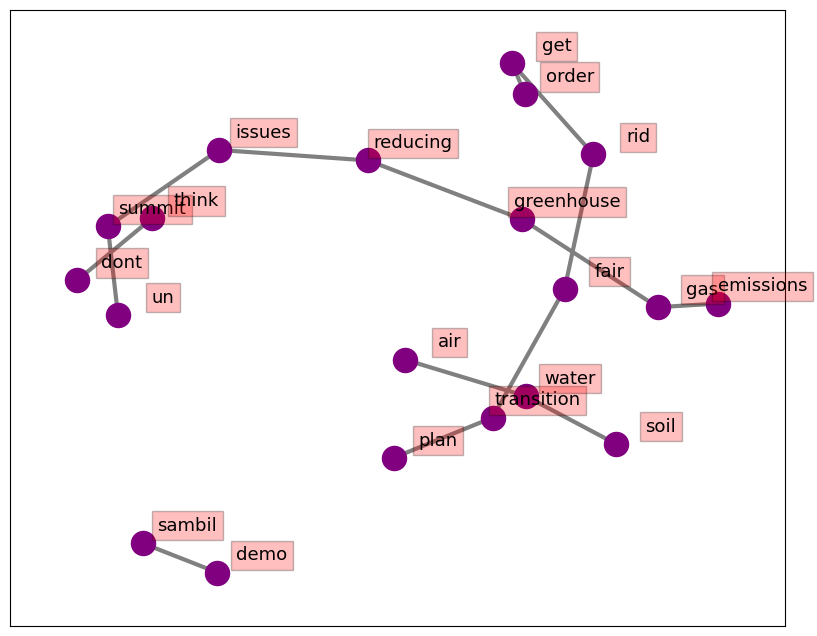

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#burayı al

# negatif uygulama 

In [42]:
# Remove polarity values equal to zero
neg_df =sentiment_df[sentiment_df.polarity < 0]
neg_df

,polarity,tweet
16,-0.034848,It is home to 172 different bird species 33 ma...
44,-0.150000,Bersama Delegate P20 Mbak Points Melakukan Pen...
47,-0.016667,herracer pistachoii I am writing last timenCan...
56,-0.044444,All of the actions and protests cannot go forw...
67,-0.300000,POINTS MANGATAKAN PANGATAKAN PANEL SURYA Di Co...
74,-0.068056,Due to the increasing greenhouse gas emission ...
93,-0.056818,In the past there was a bullshit called Greenp...
106,-0.050000,Kaanesekbann 10 000 million dogs and we are aw...
128,-0.034848,It is home to 172 different bird species 33 ma...
156,-0.150000,Bersama Delegate P20 Mbak Points Melakukan Pen...


In [43]:
print(np.average(neg_df['polarity'])) #burayı al

-0.09534632034632036


In [44]:
print(np.average(sentiment_df['polarity'])) #genel ortalama

0.19409997470062407


In [45]:
neg_tweet= neg_df["tweet"].str.split(',')
print (neg_tweet)

16     [It is home to 172 different bird species 33 m...
44     [Bersama Delegate P20 Mbak Points Melakukan Pe...
47     [herracer pistachoii I am writing last timenCa...
56     [All of the actions and protests cannot go for...
67     [POINTS MANGATAKAN PANGATAKAN PANEL SURYA Di C...
74     [Due to the increasing greenhouse gas emission...
93     [In the past there was a bullshit called Green...
106    [Kaanesekbann 10 000 million dogs and we are a...
128    [It is home to 172 different bird species 33 m...
156    [Bersama Delegate P20 Mbak Points Melakukan Pe...
159    [herracer pistachoii I am writing last timenCa...
168    [All of the actions and protests cannot go for...
179    [POINTS MANGATAKAN PANGATAKAN PANEL SURYA Di C...
186    [Due to the increasing greenhouse gas emission...
Name: tweet, dtype: object


In [46]:
#url kaldırılmış halini çağırma

neg_all_tweets_no_urls = [remove_url(tweet) for tweet in neg_tweet]
neg_all_tweets_no_urls[:5]


['It is home to 172 different bird species 33 mammals and 15 lizards and reptiles Among these species are also exhausted creaturesnThis forest renovation had a very positive effects on the ecosystem and climate',
 'Bersama Delegate P20 Mbak Points Melakukan Penanaman Pohon Di Complex Parliament Jakarta Opposite ini sekaligus menunjukkan committee Bersama Dalam Mengatasi Peroban Climate Krisis Pangan Dan Energi tetap score Capres',
 'herracer pistachoii I am writing last timenCanada is not the only responsible for this incident but I throw it to understand that even Canada is affected by the climate crisis Capitalism is uncontrolled factories cars He is responsible for the climate crisis The smell comes from people who will burn from the heat in the future sorry',
 'All of the actions and protests cannot go forward in the modern age just to vomit hate and to go further away from to have done action Nothing really is a solution oriented What has changed so far Especially climate and so o

In [47]:
# Create a list of lists containing lowercase words for each tweet; url olmadan küçük harflere ayırma #tokenizer
neg_words_in_tweet = [tweet.lower().split() for tweet in neg_all_tweets_no_urls]
neg_words_in_tweet[:2]


[['it',
  'is',
  'home',
  'to',
  '172',
  'different',
  'bird',
  'species',
  '33',
  'mammals',
  'and',
  '15',
  'lizards',
  'and',
  'reptiles',
  'among',
  'these',
  'species',
  'are',
  'also',
  'exhausted',
  'creaturesnthis',
  'forest',
  'renovation',
  'had',
  'a',
  'very',
  'positive',
  'effects',
  'on',
  'the',
  'ecosystem',
  'and',
  'climate'],
 ['bersama',
  'delegate',
  'p20',
  'mbak',
  'points',
  'melakukan',
  'penanaman',
  'pohon',
  'di',
  'complex',
  'parliament',
  'jakarta',
  'opposite',
  'ini',
  'sekaligus',
  'menunjukkan',
  'committee',
  'bersama',
  'dalam',
  'mengatasi',
  'peroban',
  'climate',
  'krisis',
  'pangan',
  'dan',
  'energi',
  'tetap',
  'score',
  'capres']]

In [48]:
# List of all words across tweets; kelimelerin sayılması
neg_all_words_no_urls = list(itertools.chain(*neg_words_in_tweet))


In [49]:
# Create counter
counts_no_urls = collections.Counter(neg_all_words_no_urls)

counts_no_urls.most_common(15)


[('the', 38),
 ('to', 18),
 ('and', 16),
 ('climate', 15),
 ('is', 12),
 ('of', 9),
 ('in', 8),
 ('a', 6),
 ('from', 6),
 ('are', 5),
 ('it', 4),
 ('species', 4),
 ('on', 4),
 ('bersama', 4),
 ('points', 4)]

In [50]:
#var olanların gösterimi
from nltk.corpus import stopwords
neg_stop_words = set(stopwords.words('english'))

# View a few words from the set
list(neg_stop_words)[0:10]


['those', 'own', 'just', 'hasn', 'was', 'we', 'yours', 'they', 'them', "isn't"]

In [51]:
# Remove stop words from each tweet list of words; kaldırılmış durumu
neg_tweets_nsw = [[word for word in tweet_words if not word in neg_stop_words]
              for tweet_words in neg_words_in_tweet]

neg_tweets_nsw[0]


['home',
 '172',
 'different',
 'bird',
 'species',
 '33',
 'mammals',
 '15',
 'lizards',
 'reptiles',
 'among',
 'species',
 'also',
 'exhausted',
 'creaturesnthis',
 'forest',
 'renovation',
 'positive',
 'effects',
 'ecosystem',
 'climate']

In [52]:
#çok kullanılanlara tekrar bakılırsa
neg_all_words_nsw = list(itertools.chain(*neg_tweets_nsw))

neg_counts_nsw = collections.Counter(neg_all_words_nsw)

neg_counts_nsw.most_common(15)


[('climate', 15),
 ('species', 4),
 ('bersama', 4),
 ('points', 4),
 ('di', 4),
 ('complex', 4),
 ('parliament', 4),
 ('committee', 4),
 ('dalam', 4),
 ('peroban', 4),
 ('tetap', 4),
 ('score', 4),
 ('capres', 4),
 ('last', 4),
 ('responsible', 4)]

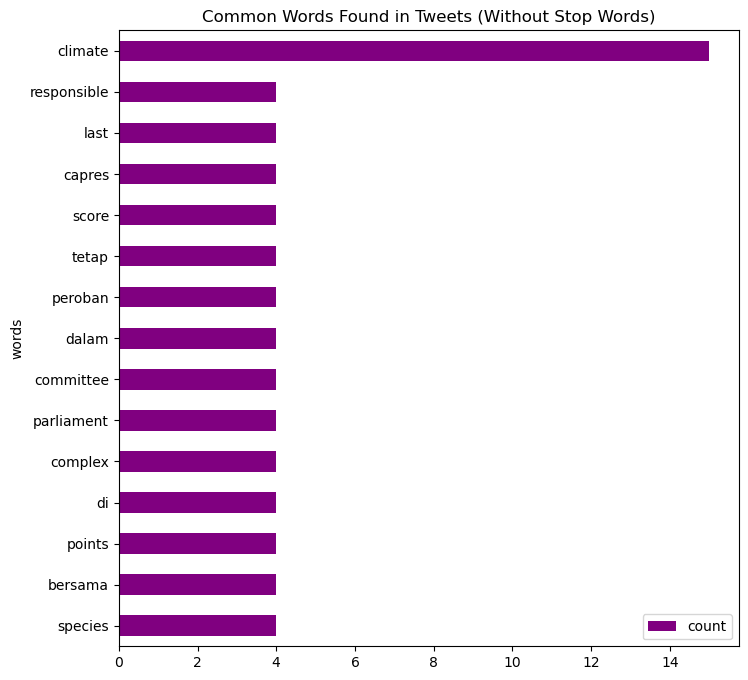

In [53]:

#görselleştirme
neg_clean_tweets_nsw = pd.DataFrame(neg_counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
neg_clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()


In [54]:
#arama kelimesinin kaldırılması

neg_collection_words = ['climate', 'change' ]
neg_tweets_nsw_nc = [[w for w in word if not w in neg_collection_words]
                 for word in neg_tweets_nsw]
neg_tweets_nsw[0]


['home',
 '172',
 'different',
 'bird',
 'species',
 '33',
 'mammals',
 '15',
 'lizards',
 'reptiles',
 'among',
 'species',
 'also',
 'exhausted',
 'creaturesnthis',
 'forest',
 'renovation',
 'positive',
 'effects',
 'ecosystem',
 'climate']

In [55]:
# Flatten list of words in clean tweets Burayı al
neg_all_words_nsw_nc = list(itertools.chain(*neg_tweets_nsw_nc))

# Create counter of words in clean tweets
neg_counts_nsw_nc = collections.Counter(neg_all_words_nsw_nc)

neg_counts_nsw_nc.most_common(15)   


[('species', 4),
 ('bersama', 4),
 ('points', 4),
 ('di', 4),
 ('complex', 4),
 ('parliament', 4),
 ('committee', 4),
 ('dalam', 4),
 ('peroban', 4),
 ('tetap', 4),
 ('score', 4),
 ('capres', 4),
 ('last', 4),
 ('responsible', 4),
 ('crisis', 4)]

In [56]:
neg_clean_tweets_ncw = pd.DataFrame(neg_counts_nsw_nc.most_common(15), # en fazla değişken kelime buradan değişir
                             columns=['words', 'count'])
neg_clean_tweets_ncw.head()



,words,count
0,species,4
1,bersama,4
2,points,4
3,di,4
4,complex,4


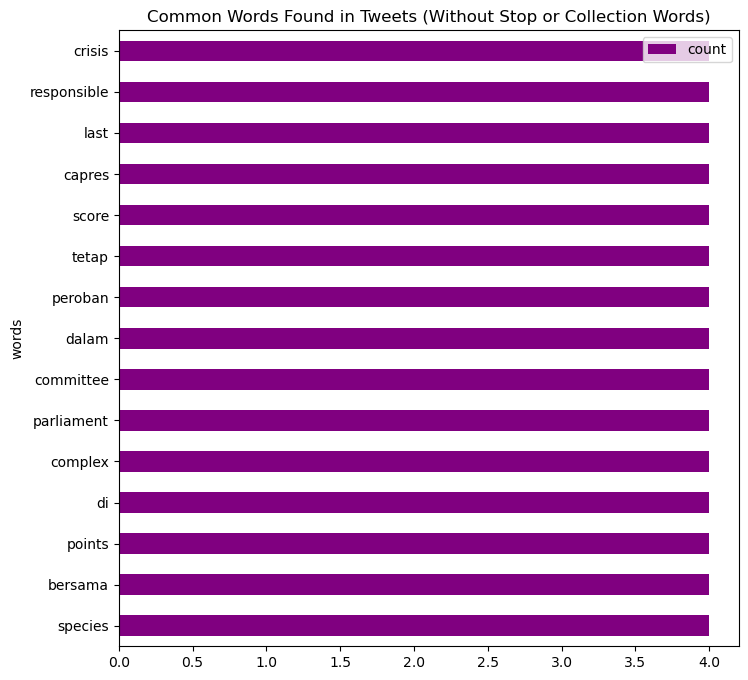

In [57]:
fig, ax = plt.subplots(figsize=(8, 8)) #çıktının boyutu 

# Plot horizontal bar graph
neg_clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)") #başlık

plt.show()


In [58]:
#Explore Co-occurring Words
# Create list of lists containing bigrams in tweets
neg_terms_bigram = [list(bigrams(tweet)) for tweet in neg_tweets_nsw_nc]

# View bigrams for the first tweet
neg_terms_bigram[0]


[('home', '172'),
 ('172', 'different'),
 ('different', 'bird'),
 ('bird', 'species'),
 ('species', '33'),
 ('33', 'mammals'),
 ('mammals', '15'),
 ('15', 'lizards'),
 ('lizards', 'reptiles'),
 ('reptiles', 'among'),
 ('among', 'species'),
 ('species', 'also'),
 ('also', 'exhausted'),
 ('exhausted', 'creaturesnthis'),
 ('creaturesnthis', 'forest'),
 ('forest', 'renovation'),
 ('renovation', 'positive'),
 ('positive', 'effects'),
 ('effects', 'ecosystem')]

In [59]:
# Flatten list of bigrams in clean tweets      BURAYI AL
neg_bigrams = list(itertools.chain(*neg_terms_bigram))

# Create counter of words in clean bigrams
neg_bigram_counts = collections.Counter(neg_bigrams)

neg_bigram_counts.most_common(15)


[(('di', 'complex'), 4),
 (('complex', 'parliament'), 4),
 (('tetap', 'score'), 4),
 (('score', 'capres'), 4),
 (('home', '172'), 2),
 (('172', 'different'), 2),
 (('different', 'bird'), 2),
 (('bird', 'species'), 2),
 (('species', '33'), 2),
 (('33', 'mammals'), 2),
 (('mammals', '15'), 2),
 (('15', 'lizards'), 2),
 (('lizards', 'reptiles'), 2),
 (('reptiles', 'among'), 2),
 (('among', 'species'), 2)]

In [60]:
neg_bigram_df = pd.DataFrame(neg_bigram_counts.most_common(15),
                             columns=['bigram', 'count'])

neg_bigram_df


,bigram,count
0,"(di, complex)",4
1,"(complex, parliament)",4
2,"(tetap, score)",4
3,"(score, capres)",4
4,"(home, 172)",2
5,"(172, different)",2
6,"(different, bird)",2
7,"(bird, species)",2
8,"(species, 33)",2
9,"(33, mammals)",2


In [61]:
# Create dictionary of bigrams and their counts
d = neg_bigram_df.set_index('bigram').T.to_dict('records')


In [62]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)


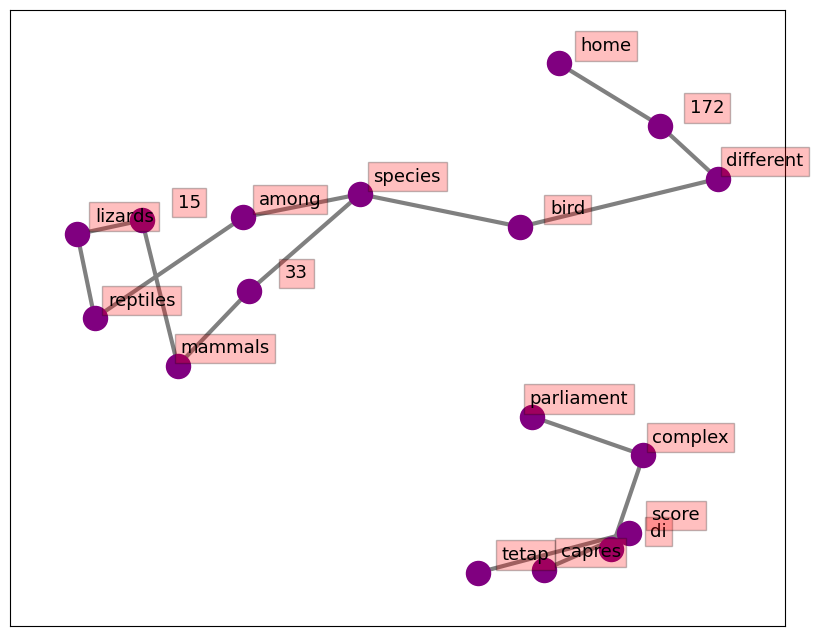

In [63]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#BURAYI AL
